# Импорт модулей и настройка путей

In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Добавляем путь к скриптам, чтобы можно было импортировать модули из ../scripts
sys.path.append(os.path.abspath('../scripts'))

## Импорт функций из проекта

In [2]:
from preprocessing_feature_engineering import load_and_preprocess_data, split_and_scale
from model_selection import (
    train_models_with_gridsearch,
    evaluate_models,
    plot_confusion_matrix,
    plot_learning_curve,
    save_best_model,
    update_readme
)
from predict import predict_and_save

## Загрузка и первичный анализ данных (train.csv)

In [3]:
# Путь к тренировочному файлу
path_train = '../data/train.csv'

# Чтение и первичный анализ данных
try:
    df = pd.read_csv(path_train)
    print('Размер данных:', df.shape)
    print('\nПервые 5 строк:')
    display(df.head())
    print('\nРаспределение классов Cover_Type:')
    print(df['Cover_Type'].value_counts(normalize=True))
    print('\nПропуски:')
    print(df.isnull().sum())
except FileNotFoundError:
    print(f"Ошибка: Файл {path_train} не найден")

Размер данных: (50120, 55)

Первые 5 строк:


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5



Распределение классов Cover_Type:
Cover_Type
2    0.576776
1    0.202634
5    0.048204
7    0.043097
3    0.043097
6    0.043097
4    0.043097
Name: proportion, dtype: float64

Пропуски:
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7  

## Загрузка test.csv и сравнение с train.csv


Сравнение данных:
train.csv shape: (50120, 55)
test.csv shape: (530892, 55)
Train columns: ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40', 'Cover_Ty

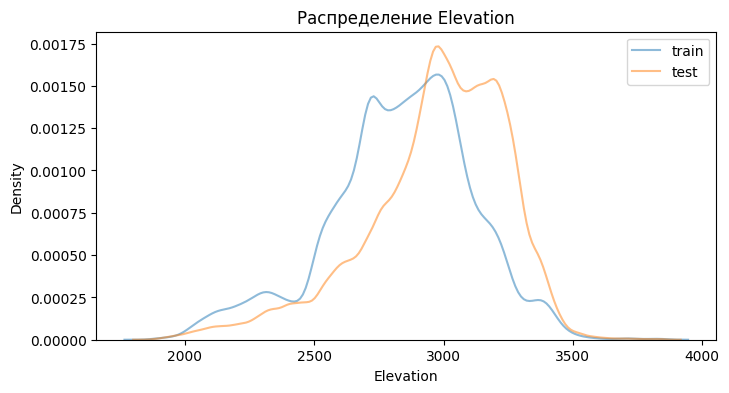

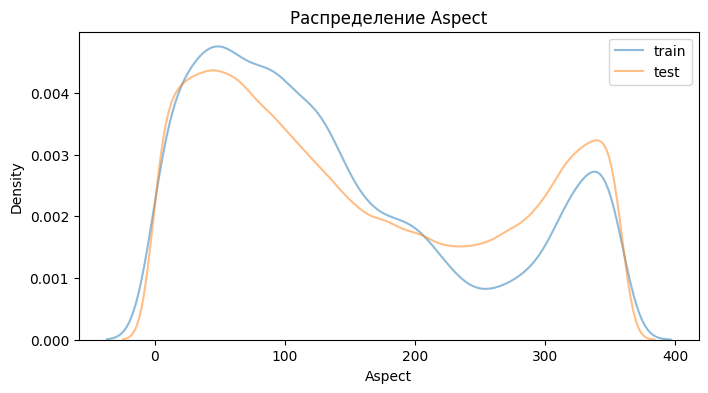

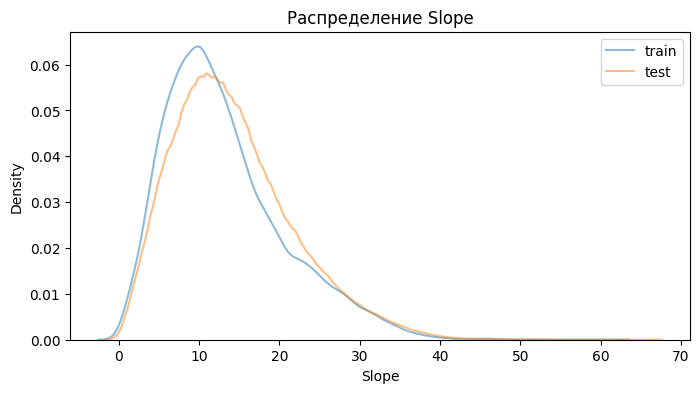

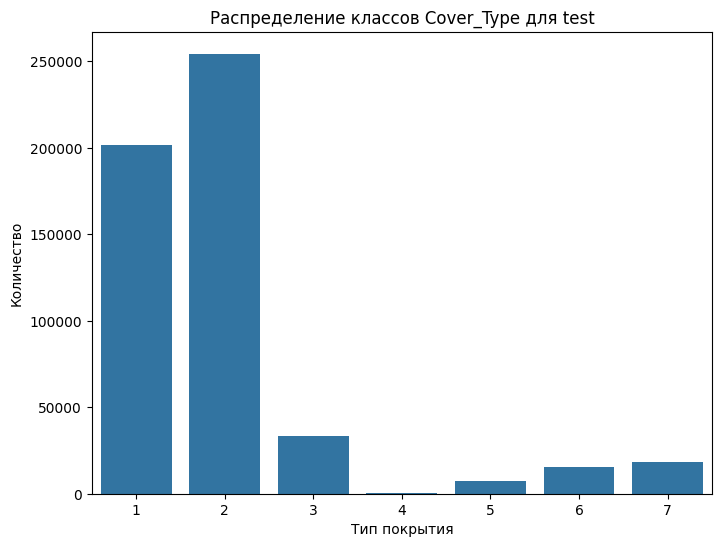

In [4]:
# Чтение test.csv и сравнение с тренировочными данными  
try:
    test_df = pd.read_csv('../data/test.csv')
    print('\nСравнение данных:')
    print(f'train.csv shape: {df.shape}')
    print(f'test.csv shape: {test_df.shape}')
    print('Train columns:', df.columns.tolist())
    print('Test columns:', test_df.columns.tolist())
    
    print('\nПропуски в test.csv:')
    print(test_df.isnull().sum())
    
    # Сравнение распределений для первых 3 числовых столбцов (исключая Cover_Type)
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    numeric_cols = numeric_cols.drop('Cover_Type', errors='ignore')
    
    os.makedirs('../results/plots', exist_ok=True)
    for col in numeric_cols[:3]:
        plt.figure(figsize=(8, 4))
        sns.kdeplot(df[col], label='train', alpha=0.5)
        sns.kdeplot(test_df[col], label='test', alpha=0.5)
        plt.title(f'Распределение {col}')
        plt.legend()
        plt.savefig(f'../results/plots/distribution_{col}.png')
        plt.show()
except FileNotFoundError:
    print("test.csv не найден")
except Exception as e:
    print(f"Ошибка при сравнении: {e}")

    # График распределения классов Cover_Type
plt.figure(figsize=(8, 6))
sns.countplot(x='Cover_Type', data=test_df)
plt.title('Распределение классов Cover_Type для test')
plt.xlabel('Тип покрытия')
plt.ylabel('Количество')
plt.savefig('../results/plots/class_distribution.png')
plt.show()

## Построение дополнительных графиков

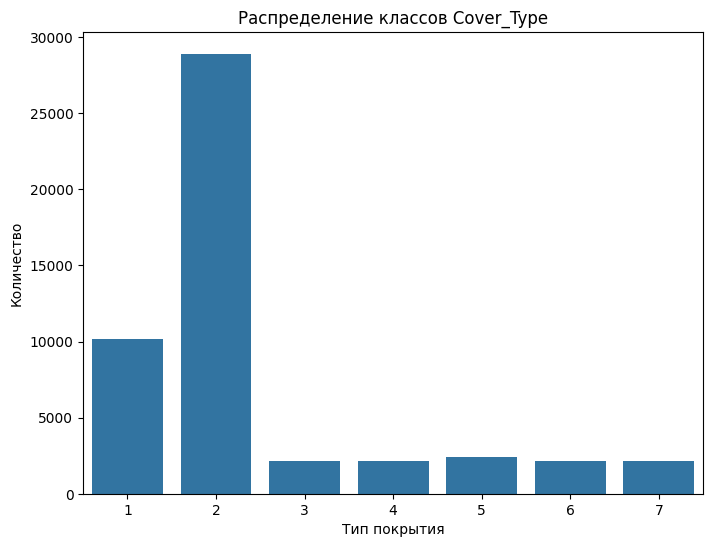

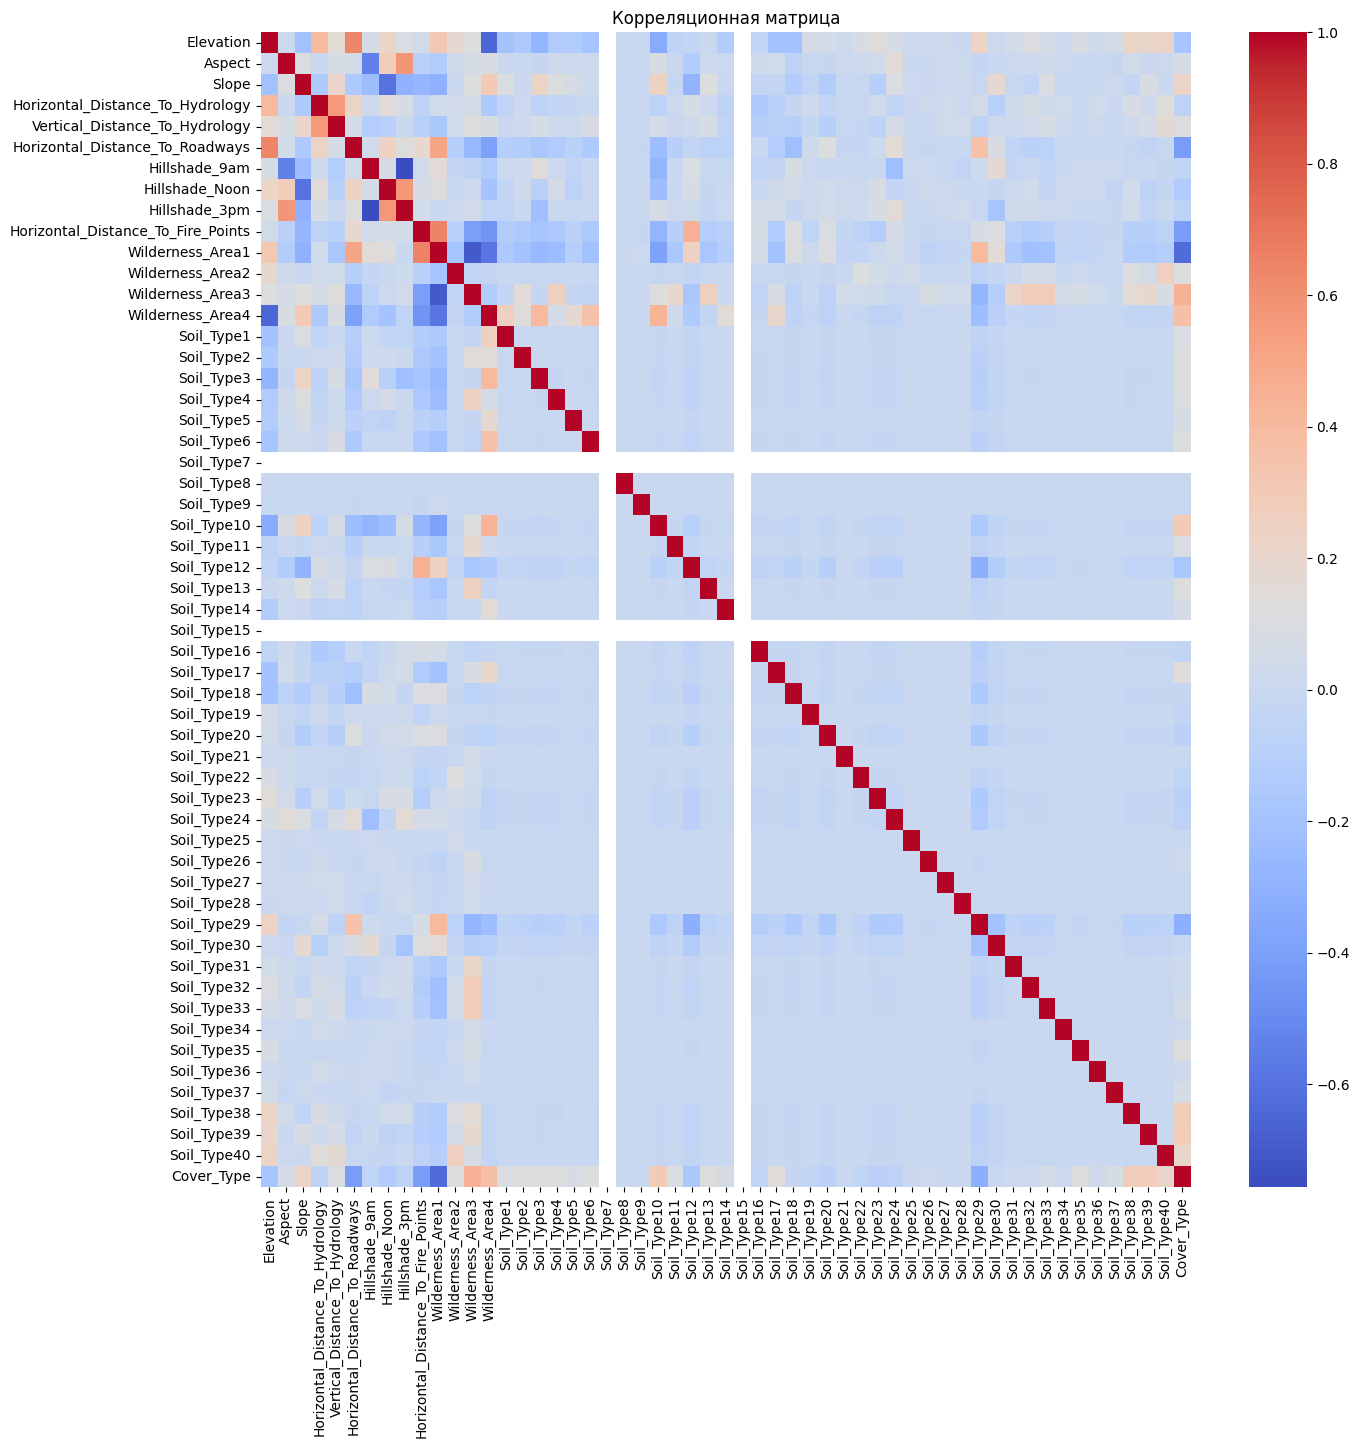

In [5]:
# График распределения классов Cover_Type
plt.figure(figsize=(8, 6))
sns.countplot(x='Cover_Type', data=df)
plt.title('Распределение классов Cover_Type')
plt.xlabel('Тип покрытия')
plt.ylabel('Количество')
plt.savefig('../results/plots/class_distribution.png')
plt.show()

# Корреляционная матрица
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Корреляционная матрица')
plt.savefig('../results/plots/correlation_matrix.png')
plt.show()

## Анализ новых признаков

Загружено ../data/train.csv: (50120, 55)
После feature engineering: (50120, 63)
Удаляем исходные признаки: ['Elevation', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Horizontal_Distance_To_Roadways']
После удаления исходных признаков: (50120, 55)
Финальные столбцы: ['Aspect', 'Slope', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'S

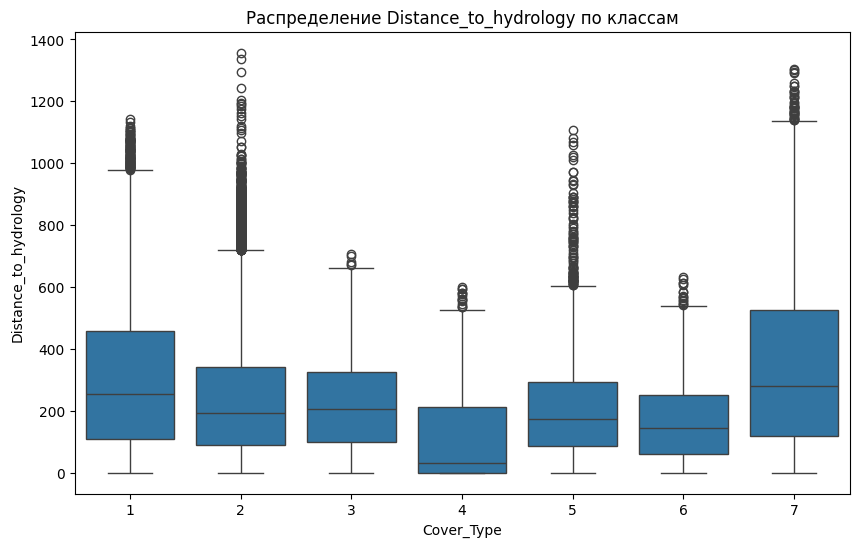

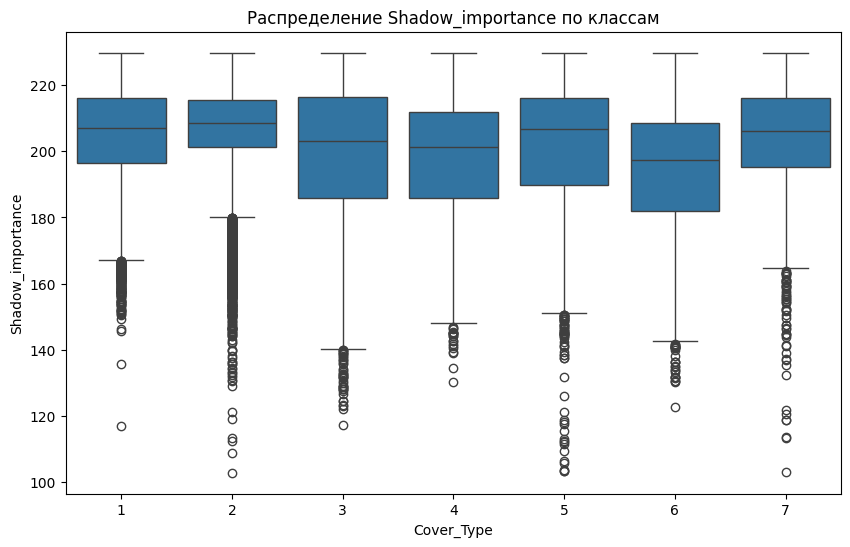

In [6]:
# Применяем feature engineering для получения новых признаков
df_processed = load_and_preprocess_data('../data/train.csv')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cover_Type', y='Distance_to_hydrology', data=df_processed)
plt.title('Распределение Distance_to_hydrology по классам')
plt.savefig('../results/plots/distance_to_hydrology.png')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cover_Type', y='Shadow_importance', data=df_processed)
plt.title('Распределение Shadow_importance по классам')
plt.savefig('../results/plots/shadow_importance.png')
plt.show()

## Предобработка, разделение данных и обучение модели

Загружено ../data/train.csv: (50120, 55)
После feature engineering: (50120, 63)
Удаляем исходные признаки: ['Elevation', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Horizontal_Distance_To_Roadways']
После удаления исходных признаков: (50120, 55)
Финальные столбцы: ['Aspect', 'Slope', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'S

c:\01Founders\forest-prediction\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression - Лучший CV Score: 0.7149
LogisticRegression - Точность на обучающем наборе: 0.6992

Обучение модели: SVM
SVM - Лучший CV Score: 0.8500
SVM - Точность на обучающем наборе: 0.9242

Оценка моделей на тестовом наборе:
LogisticRegression: Точность = 0.6963, F1-score = 0.7071
SVM: Точность = 0.8879, F1-score = 0.8887

Модель: LogisticRegression
Лучшие параметры: {'clf__C': 0.2, 'clf__max_iter': 100, 'clf__solver': 'lbfgs'}


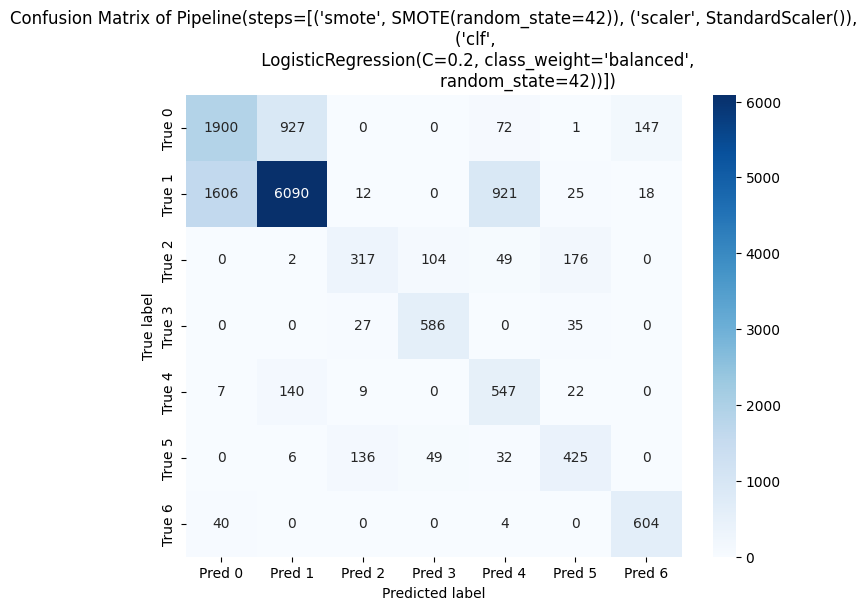

        Pred 0  Pred 1  Pred 2  Pred 3  Pred 4  Pred 5  Pred 6
True 0    1900     927       0       0      72       1     147
True 1    1606    6090      12       0     921      25      18
True 2       0       2     317     104      49     176       0
True 3       0       0      27     586       0      35       0
True 4       7     140       9       0     547      22       0
True 5       0       6     136      49      32     425       0
True 6      40       0       0       0       4       0     604

Модель: SVM
Лучшие параметры: {'clf__C': 40, 'clf__gamma': 0.1, 'clf__kernel': 'rbf'}


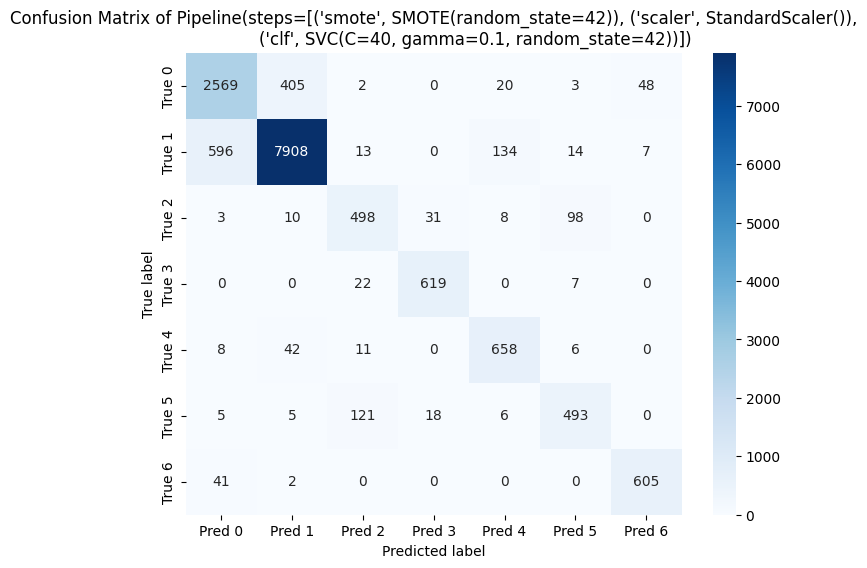

        Pred 0  Pred 1  Pred 2  Pred 3  Pred 4  Pred 5  Pred 6
True 0    2569     405       2       0      20       3      48
True 1     596    7908      13       0     134      14       7
True 2       3      10     498      31       8      98       0
True 3       0       0      22     619       0       7       0
True 4       8      42      11       0     658       6       0
True 5       5       5     121      18       6     493       0
True 6      41       2       0       0       0       0     605


In [ ]:
# Загрузка и предобработка данных
df_processed = load_and_preprocess_data(path_train)
X_train, X_test, y_train, y_test = split_and_scale(df_processed)
print('Размер тренировочного набора:', X_train.shape)
print('Размер тестового набора:', X_test.shape)

# Обучение моделей
results, best_model = train_models_with_gridsearch(X_train, y_train)
test_accuracies, test_f1_scores = evaluate_models(results, X_test, y_test)
for name, result in results.items():
    print(f"\nМодель: {name}")
    print(f"Лучшие параметры: {result['best_params']}")
    cm_df = plot_confusion_matrix(result["best_model"], X_test, y_test)
    print(cm_df)   
       

## Анализ лучшей модели и визуализация результатов

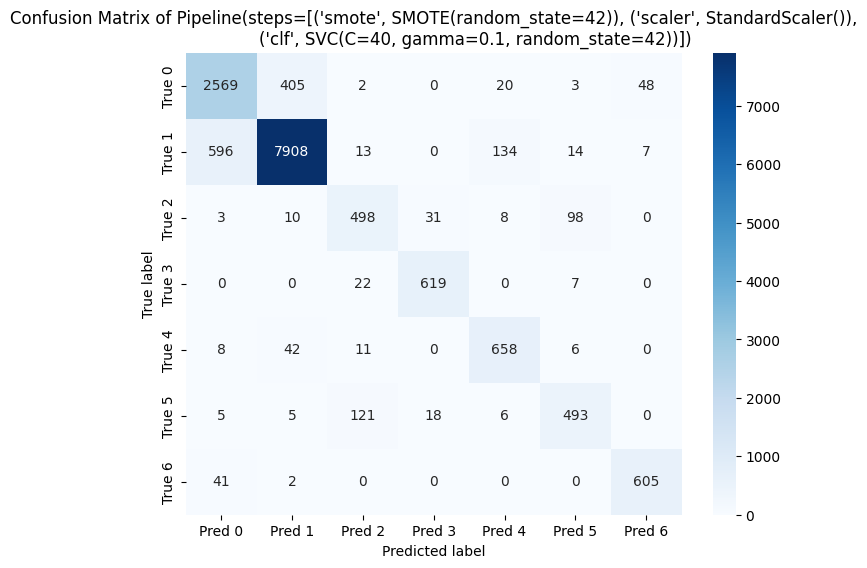

Confusion Matrix:
         Pred 0  Pred 1  Pred 2  Pred 3  Pred 4  Pred 5  Pred 6
True 0    2569     405       2       0      20       3      48
True 1     596    7908      13       0     134      14       7
True 2       3      10     498      31       8      98       0
True 3       0       0      22     619       0       7       0
True 4       8      42      11       0     658       6       0
True 5       5       5     121      18       6     493       0
True 6      41       2       0       0       0       0     605


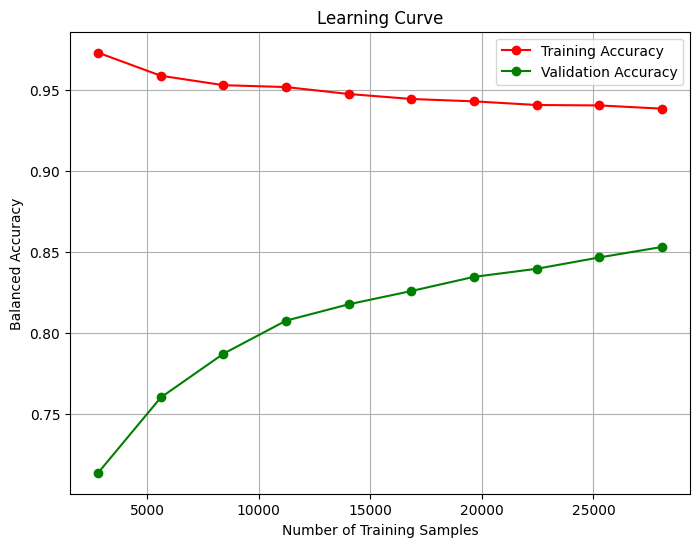

In [8]:
# Анализ лучшей модели
cm_df = plot_confusion_matrix(best_model, X_test, y_test)
print('Confusion Matrix:\n', cm_df)

plot_learning_curve(best_model, X_train, y_train, cv=5) 

## Сохранение модели, обновление README и предсказания на тестовых данных

In [9]:
# Сохранение лучшей модели
save_best_model(best_model)

# Обновление README с результатами обучения
 
update_readme(results, test_f1_scores)


# Выполнение предсказаний и сохранение результатов для test.csv
predict_and_save('../data/test.csv', '../results/best_model.pkl', '../results/test_predictions.csv') 

✅ Модель сохранена в '../results/best_model.pkl'
test.csv shape: (530892, 55)
Столбцы в test.csv: ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40', 'Co

0.6580716981985036